In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flights_df = pd.read_csv("data/german_airline_connection_costs.csv", usecols=[0, 1, 2])
graph = nx.from_pandas_edgelist(
    flights_df,
    source="Source",
    target="Target",
    create_using=nx.DiGraph(),
    edge_attr=True,
)

## Podstawowe informacje

In [3]:
print(f"Wierzchołki: {graph.nodes}")
print(f"Ilość wierzchołków: {len(graph.nodes)}")
print(f"Ilość krawędzi: {len(graph.edges)}")
print(f"Średnica gafu: {nx.diameter(graph)}")
print(f"Średnia długość grafu: {nx.average_shortest_path_length(graph)}")

Wierzchołki: ['BER', 'CGN', 'DUS', 'FRA', 'MUC', 'SCN', 'STR', 'BRE', 'HAM', 'DTM', 'GWT', 'DRS', 'FDH', 'HAJ', 'HDF', 'LEJ', 'FMO', 'NUE', 'MHG', 'LBC', 'PAD']
Ilość wierzchołków: 21
Ilość krawędzi: 92
Średnica gafu: 3
Średnia długość grafu: 1.9452380952380952


In [4]:
nx.shortest_path(graph, source="BER").keys()

dict_keys(['BER', 'CGN', 'DUS', 'FRA', 'MUC', 'SCN', 'STR', 'HAM', 'DRS', 'GWT', 'BRE', 'FDH', 'HAJ', 'HDF', 'LEJ', 'FMO', 'NUE', 'DTM', 'LBC', 'PAD', 'MHG'])

## Stopnie grafu

In [5]:
nodes_degree = [
    n for n, d in sorted(nx.degree(graph), key=lambda x: x[1], reverse=True)
]
degrees = [d for n, d in sorted(nx.degree(graph), key=lambda x: x[1], reverse=True)]

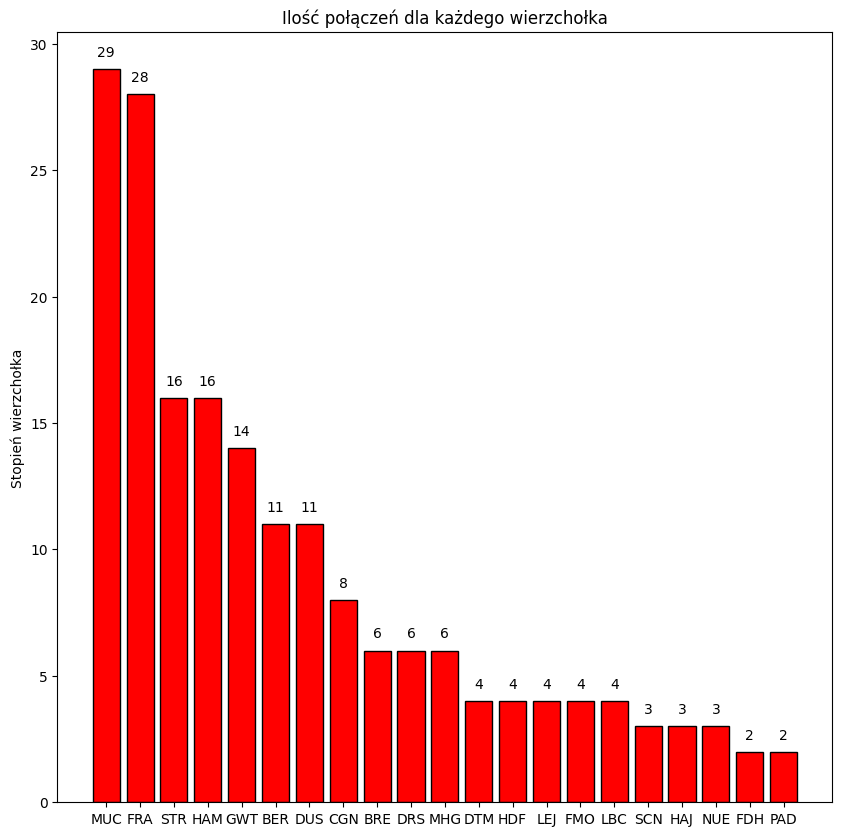

In [6]:
plt.figure(figsize=(10, 10))
plt.bar(nodes_degree, degrees, color="red", width=0.8, edgecolor="black")
for i in range(len(graph.nodes)):
    plt.text(i, degrees[i] + 0.5, degrees[i], ha="center")

plt.ylabel("Stopień wierzchołka")
plt.title("Ilość połączeń dla każdego wierzchołka")
plt.show()

## Centralność wierzchołków

In [7]:
nodes_betweenness = [
    n
    for n, v in sorted(
        nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]
values_betweenness = [
    v
    for n, v in sorted(
        nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]

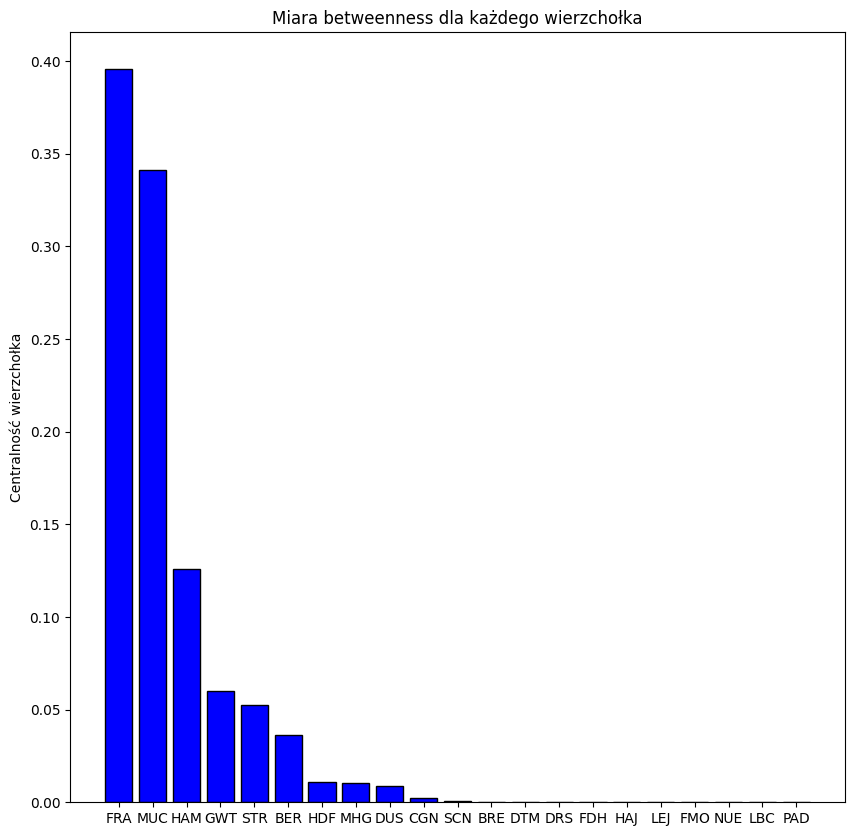

In [8]:
plt.figure(figsize=(10, 10))
plt.bar(
    nodes_betweenness, values_betweenness, color="blue", width=0.8, edgecolor="black"
)
plt.ylabel("Centralność wierzchołka")
plt.title("Miara betweenness dla każdego wierzchołka")
plt.show()

In [9]:
nodes_closeness = [
    n
    for n, v in sorted(
        nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]
values_closeness = [
    v
    for n, v in sorted(
        nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True
    )
]

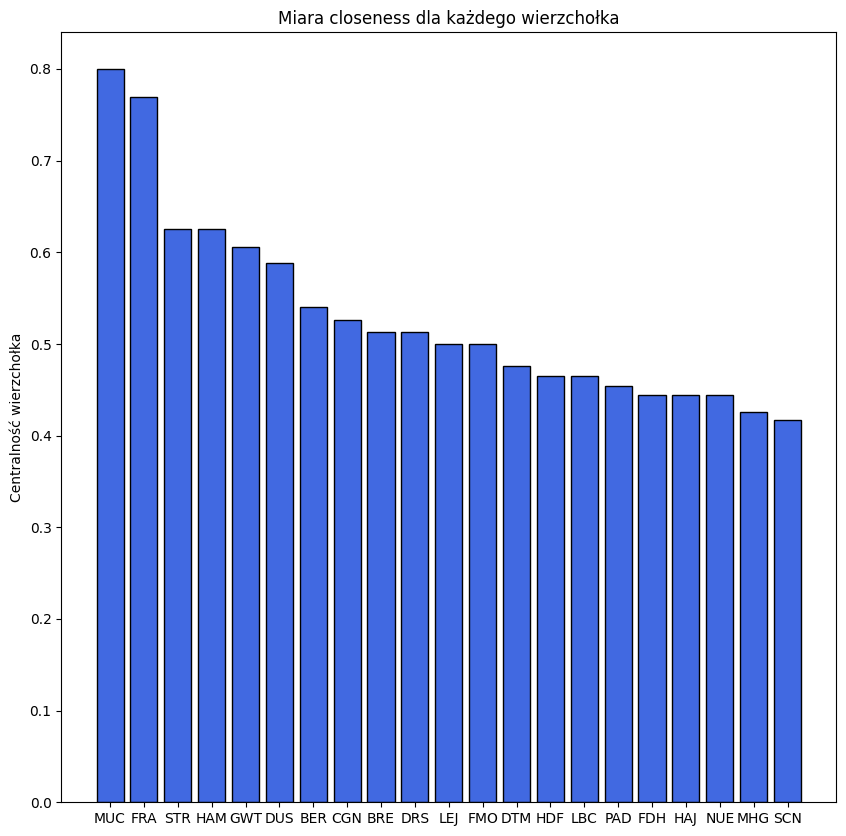

In [10]:
plt.figure(figsize=(10, 10))
plt.bar(
    nodes_closeness, values_closeness, color="royalblue", width=0.8, edgecolor="black"
)

plt.ylabel("Centralność wierzchołka")
plt.title("Miara closeness dla każdego wierzchołka")
plt.show()

## Loty z przesiadkami

In [11]:
shortest_long_paths = []
for node_1 in graph.nodes:
    for node_2 in graph.nodes:
        shortest_path = nx.shortest_path(graph, node_1, node_2)
        if len(shortest_path) > 2:
            shortest_long_paths.append(shortest_path)
            # print(shortest_path)
            # print(nx.path_weight(graph, shortest_path, weight='Cost'))

print(
    "Ilość wszystkich najkrószych ściezek, z wierzchołkami pośrednimi: ",
    len(shortest_long_paths),
)

Ilość wszystkich najkrószych ściezek, z wierzchołkami pośrednimi:  328


W Niemczech na 420 mozliwcyh połączeń bezpośrednich między miastami, występuje ich jedynie 92. 

In [12]:
for node_1 in graph.nodes:
    for node_2 in graph.nodes:
        path = nx.dijkstra_path(graph, source=node_1, target=node_2, weight="Cost")
        if len(path) > 2 and graph.has_edge(node_1, node_2):
            print(path)

['HAM', 'DUS', 'GWT']
['DTM', 'MUC', 'GWT']
['GWT', 'MUC', 'DTM']


In [13]:
print(nx.path_weight(graph, ["HAM", "DUS", "GWT"], weight="Cost"))
print(nx.path_weight(graph, ["HAM", "GWT"], weight="Cost"), "\n")

print(nx.path_weight(graph, ["DTM", "MUC", "GWT"], weight="Cost"))
print(nx.path_weight(graph, ["DTM", "GWT"], weight="Cost"), "\n")

print(nx.path_weight(graph, ["GWT", "MUC", "DTM"], weight="Cost"))
print(nx.path_weight(graph, ["GWT", "DTM"], weight="Cost"))

804
1304 

1178
1747 

747
797


Lot z przesiadką opłaca się wykonać jedynie w trzech przypadkach:
- HAM -> DUS -> GWT `804` zamiast `1304`
- DTM -> MUC -> GWT `1178` zamiast `1747`
- GWT -> MUC -> DTM `747` zamiaast `797`

In [17]:
nx.is_strongly_connected(graph)

True

Niemiecka struktura pozwala na podróz lotniczą pomiędzy wszystkimi dowolnymi miastami.

In [15]:
from statistics import mean


outgoing_weights = {}
ingoing_weights = {}
for node in graph.nodes:
    outgoing_edges = graph.out_edges(node)
    ingoing_edges = graph.in_edges(node)
    outgoing_weights[node] = []
    ingoing_weights[node] = []

    for edge in outgoing_edges:
        weight = nx.path_weight(graph, path=[edge[0], edge[1]], weight="Cost")
        outgoing_weights[node].append(weight)

    for edge in ingoing_edges:
        weight = nx.path_weight(graph, path=[edge[0], edge[1]], weight="Cost")
        ingoing_weights[node].append(weight)

    outgoing_weights[node] = float(mean(outgoing_weights[node]))
    ingoing_weights[node] = float(mean(ingoing_weights[node]))

mean_outgoing_weights = sorted(
    outgoing_weights.items(), key=lambda x: x[1], reverse=True
)
mean_ingoing_weights = sorted(ingoing_weights.items(), key=lambda x: x[1], reverse=True)

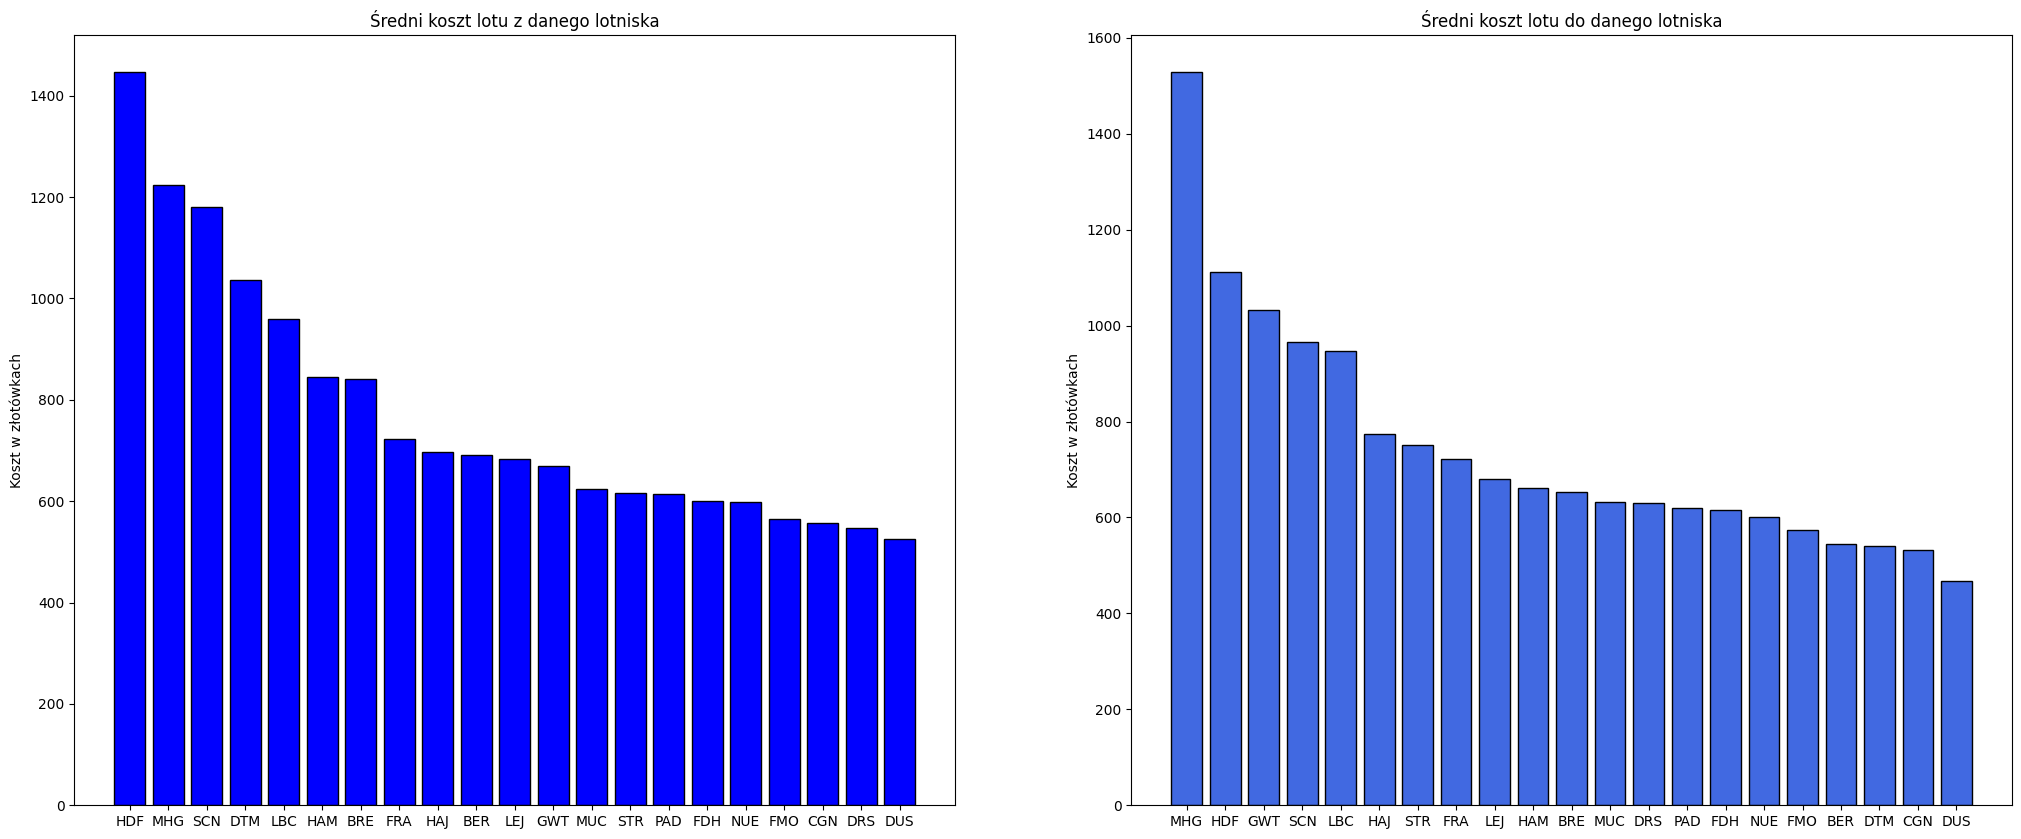

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].bar(
    [n for n, v in mean_outgoing_weights],
    [v for n, v in mean_outgoing_weights],
    color="blue",
    width=0.8,
    edgecolor="black",
)
ax[0].set_ylabel("Koszt w złotówkach")
ax[0].set_title("Średni koszt lotu z danego lotniska")

ax[1].bar(
    [n for n, v in mean_ingoing_weights],
    [v for n, v in mean_ingoing_weights],
    color="royalblue",
    width=0.8,
    edgecolor="black",
)
ax[1].set_ylabel("Koszt w złotówkach")
ax[1].set_title("Średni koszt lotu do danego lotniska")

plt.show()